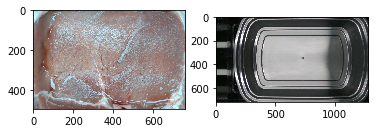

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

carne = cv2.imread('carne.jpeg')
plato = cv2.imread('plato.jpeg')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(carne, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(plato, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
carne_hsv = cv2.cvtColor(carne, cv2.COLOR_BGR2HSV)
plato_hsv = cv2.cvtColor(plato, cv2.COLOR_BGR2HSV)
carne_rgb = cv2.cvtColor(carne, cv2.COLOR_BGR2RGB)
plato_rgb = cv2.cvtColor(plato, cv2.COLOR_BGR2RGB)

nrows,ncols,nch = carne_hsv.shape
Xhsv_carne = np.reshape(carne_hsv,(nrows*ncols,3))
Xrgb_carne = np.reshape(carne_rgb,(nrows*ncols,3))

nrows,ncols,nch = plato_hsv.shape
Xhsv_plato = np.reshape(plato_hsv,(nrows*ncols,3))
Xrgb_plato = np.reshape(plato_rgb,(nrows*ncols,3))

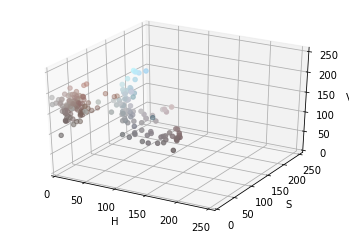

In [3]:
idx = np.random.permutation(len(Xhsv_carne))[:200]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Xhsv_carne[idx,0], Xhsv_carne[idx,1], Xhsv_carne[idx,2], c=Xrgb_carne[idx,:]/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('H')
ax.set_ylabel('S')
ax.set_zlabel('V')
plt.show()

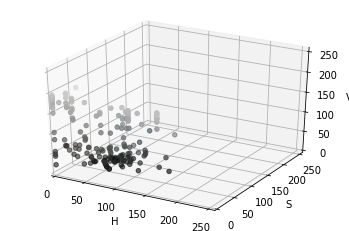

In [4]:
idx = np.random.permutation(len(Xhsv_plato))[:200]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(Xhsv_plato[idx,0], Xhsv_plato[idx,1], Xhsv_plato[idx,2], c=Xrgb_plato[idx,:]/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('H')
ax.set_ylabel('S')
ax.set_zlabel('V')
plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
X = np.concatenate((Xhsv_carne,Xhsv_plato))
Ycarne = np.ones(len(Xhsv_carne))
Yplato = np.zeros(len(Xhsv_plato))
Y = np.concatenate((Ycarne,Yplato))
idx = np.random.permutation(len(Xhsv_plato))[:1000]
X = X[idx,:]
Y = Y[idx]
print('X',X.shape)
print('Y',Y.shape)

X (1000, 3)
Y (1000,)


In [7]:
model = MLPClassifier()
model.fit(X,Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

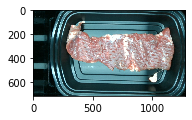

In [8]:
prueba = cv2.imread('prueba.jpeg')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(prueba, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
prueba_hsv = cv2.cvtColor(prueba, cv2.COLOR_BGR2HSV)

nrows,ncols,nch = prueba_hsv.shape
Xhsv_prueba = np.reshape(prueba_hsv,(nrows*ncols,3))

nrows 720 ncols 1280 len(L) 921600


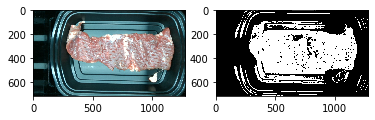

In [12]:
L = model.predict(Xhsv_prueba)
print('nrows',nrows,'ncols',ncols,'len(L)',len(L))
Limage = np.reshape(L,(nrows,ncols))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(prueba, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(Limage,cmap='gray')
plt.show()